## IMPORTING NECCESSARY LIBRARIES

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## LOADING DATASET FROM GITHUB

In [29]:
df=pd.read_csv("https://raw.githubusercontent.com/Ayushi0214/Customer-Churn-analysis/refs/heads/main/Customer%20Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## CHECKING THE INFO OF DATA

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## REPLACING BLANKS WITH 0 AS TENURE IS 0 AND NO TOTAL CHAARGE IS RECORDED

In [31]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0" )
df["TotalCharges"]=df["TotalCharges"].astype("float")

## CHECKING THE NULL VALUES

In [35]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## DESCRIPTIVE ANALYSIS

In [36]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## CHECKING FOR DUPLICATE

In [37]:
df.duplicated().sum()

np.int64(0)

In [40]:
df["customerID"].duplicated()
#checking on the basis of  a particular columb

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: customerID, Length: 7043, dtype: bool

## COUNT OF CHURN

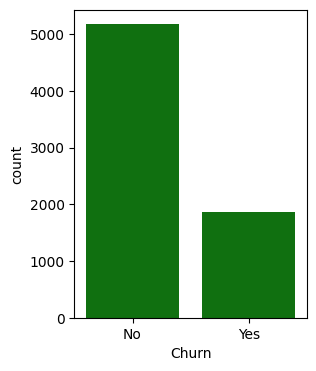

In [94]:
plt.figure(figsize= (3,4))
# Create a countplot for the 'Churn' column with a red color
sns.countplot(x=df["Churn"], color='GREEN')

# Display the plot
plt.show()

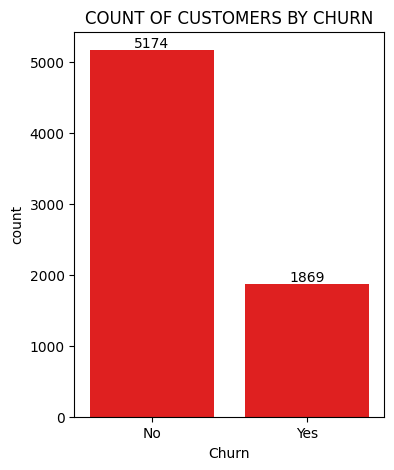

In [96]:
plt.figure(figsize= (4,5))
ax=sns.countplot(x="Churn",data=df,color ="r")
ax.bar_label(ax.containers[0])
plt.title("COUNT OF CUSTOMERS BY CHURN")
plt.show()
#getting the values too

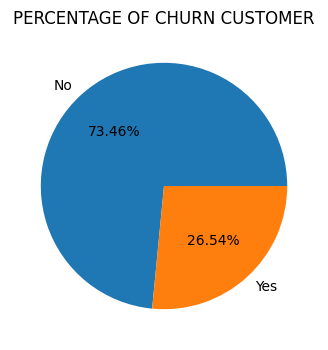

In [54]:
plt.figure(figsize= (5,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("PERCENTAGE OF CHURN CUSTOMER")
plt.show()

#FROM THE GIVEN CHART WE CAN CONCLUDE THAT 26.54% OF UOR CUSTOMER HAVE CHURNED OUT NOW LETS EXPLORE THE REASON BEHIND IT

## FINDING  THE CHURN RATE BY GENDER

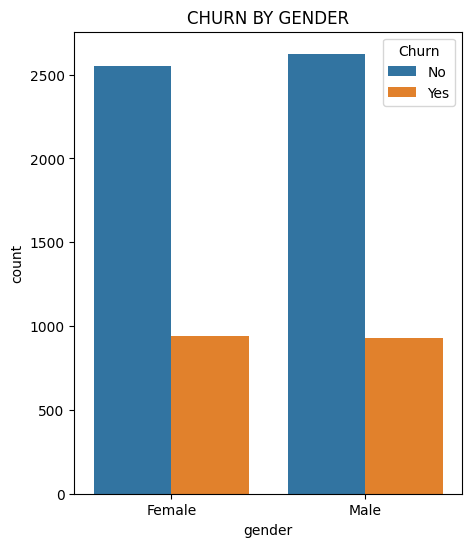

In [62]:
plt.figure(figsize=(5,6))
sns.countplot(x="gender", data=df, hue = "Churn" )
plt.title("CHURN BY GENDER")
plt.show()

## CHURN BY SENIOR CITIZEN

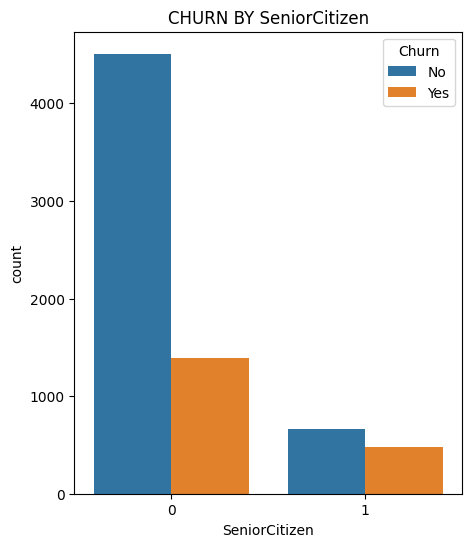

In [65]:
plt.figure(figsize=(5,6))
sns.countplot(x="SeniorCitizen", data=df, hue = "Churn" )
plt.title("CHURN BY SeniorCitizen")
plt.show()

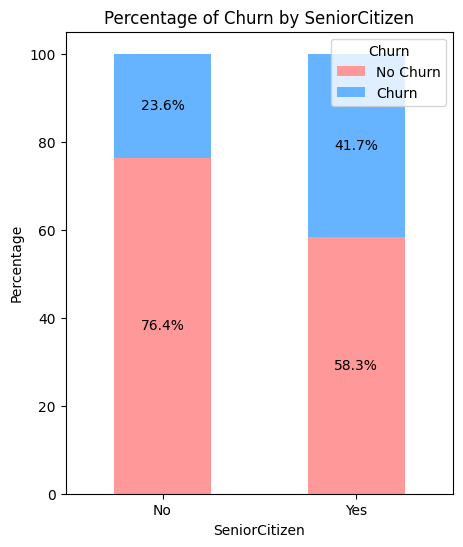

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame
# Calculate the count of churn by SeniorCitizen
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)

# Calculate the percentage of churn and non-churn by SeniorCitizen
churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = churn_percentage.plot(kind='bar', stacked=True, figsize=(5,6), color=['#ff9999','#66b3ff'])

# Add the percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    
    # Display the percentage text on top of the bars
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', 
            ha='center', va='center', fontsize=10, color='black')

# Customize the plot
plt.title("Percentage of Churn by SeniorCitizen")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title="Churn", labels=["No Churn", "Churn"])
plt.show()


## CHURN RATE BY CONTRACT

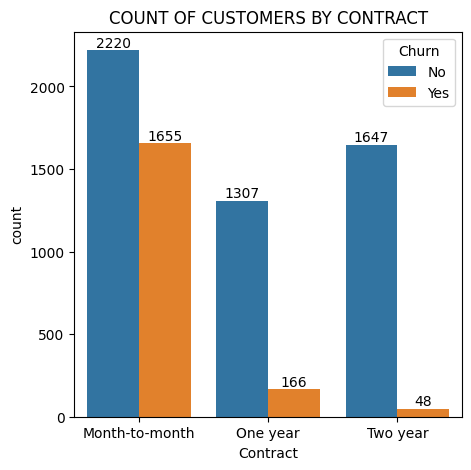

In [97]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("COUNT OF CUSTOMERS BY CONTRACT")
plt.show()

PEOPLE WHO HAVE M TO M CONTRACT HAVE  HIGHER RATE OF CHURN

## CHURN RATE BY TENURE

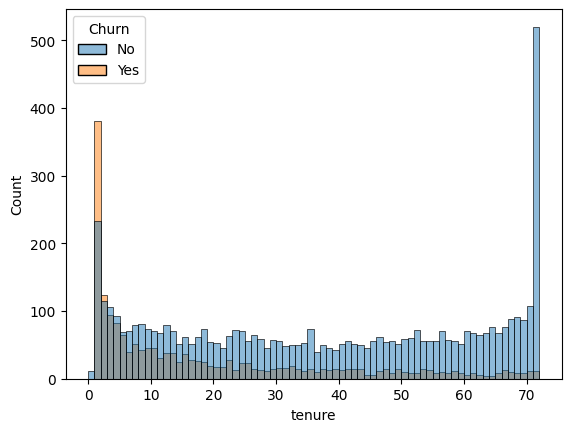

In [72]:
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

In [74]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### CREATING A SUBPPLOT OF FOLLOWING COLUMNS
'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'

<Figure size 0.1x0.1 with 0 Axes>

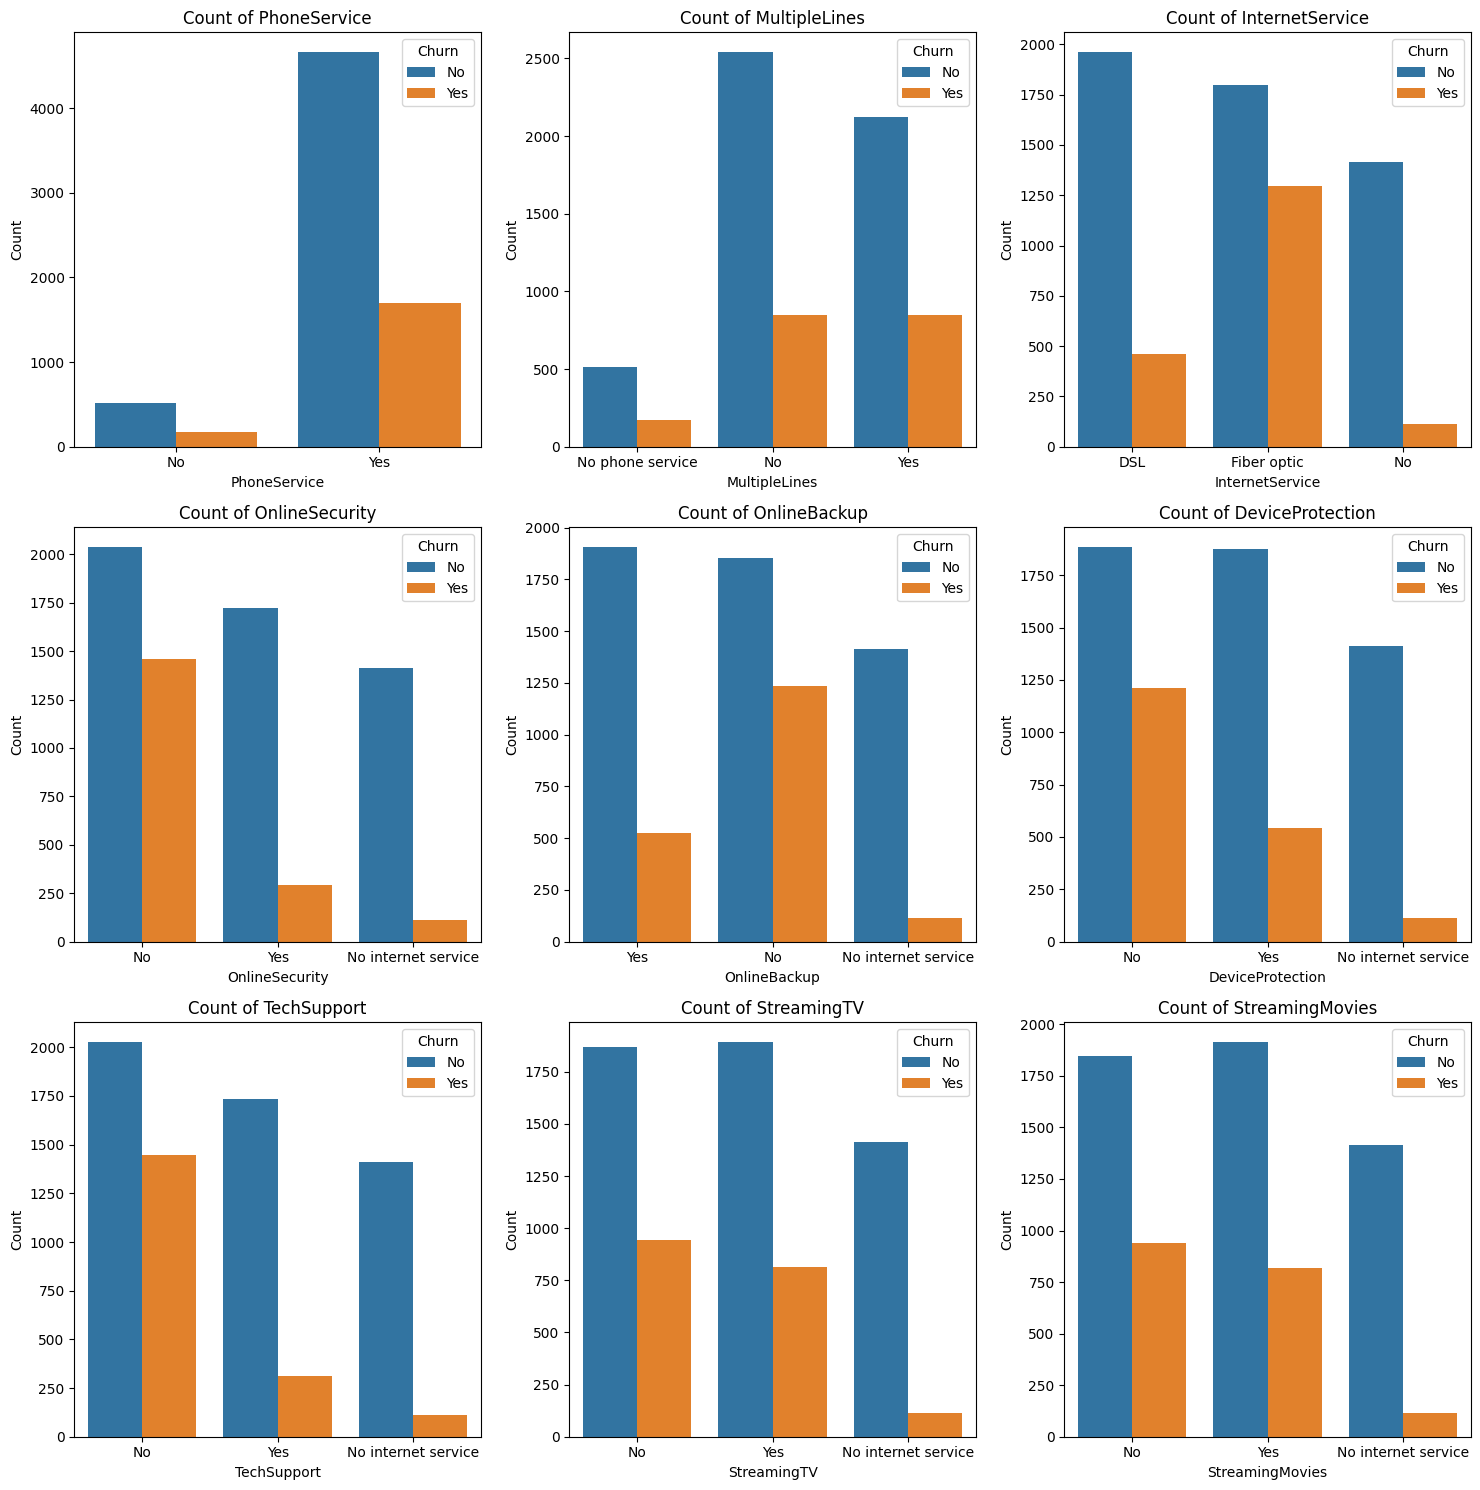

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(.001,.001))
# List of the columns you want to create countplots for
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a 3x3 grid of subplots (9 plots in total)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes to make iteration easier
axes = axes.flatten()

# Iterate over each column and plot its countplot
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i],hue = "Churn")
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()
#USE OF CHAT GPT HAPPEN  HERE

THE MAJORITY OF CUSTOMER WHO DO NOT CHURN TEND TO HAVE SERVICES LIKE PHONE SERVICE INTERNET SERVICE(PARTICULARLY DSL)
AND ONLINE SECURITY ENABLED. FOR SERVICES LIKE ONLINE BACKUP, TECH SUPPORT AND STREAMING TV CHURN RATE ARE NOTICIBLE HIGHER
WHEN THESE SERVISES ARE NOT USED AND ARE UNAVAILABLE.

## CHECKING CHURN BY PAYMENT METHOD

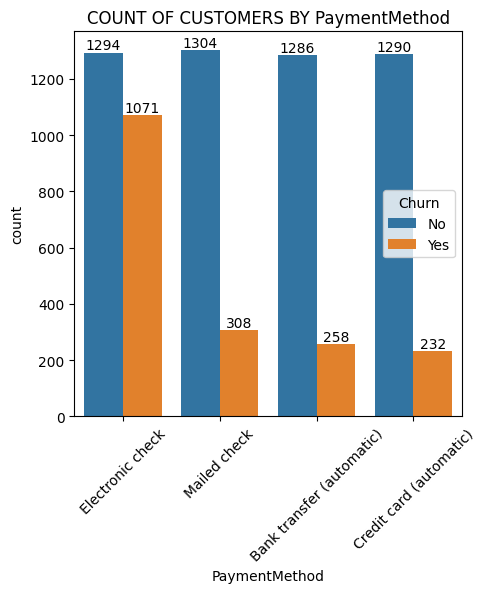

In [89]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation =45)
plt.title("COUNT OF CUSTOMERS BY PaymentMethod")
plt.show()

CUSTOMER IS LIKELY  TO CHURN WHEN HE IS USING ELECTRONIC CHECK AS A PAYMENT METHOD